In [68]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

import itertools

# configuración de gpu o cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Calcular la desviación estándar y la media de cada canal del conjunto de datos de entrenamiento de CIFAR-10

In [69]:
# dirección donde se descargará el dataset
data_dir = './data'

In [70]:
# descargar y cargar el dataset
cifar_trainset = datasets.CIFAR10(root=data_dir,
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  download=False)

In [71]:
imgs = [item[0] for item in cifar_trainset]  # item[0] and item[1] are image and its label
imgs = torch.stack(imgs, dim=0).numpy()  # convertir de tensor a np.array para facilitar cálculos

In [72]:
# cálculo de la media sobre cada canal (r,g,b)
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

# cálculo de la desviación estándar sobre cada canal (r,g,b)
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


In [132]:
mean_r,mean_g,mean_b = 0.49139968,0.48215827,0.44653124
std_r,std_g,std_b = 0.24703233, 0.24348505,0.26158768

### Función para cargar los datos

In [131]:
def data_loader(data_dir, 
                batch_size,
                random_seed=42,
                valid_size=0.1,
                shuffle=True,
                test=False):
    
# utilizado para estandarizar los datos
    normalize = transforms.Normalize(
        mean=[mean_r, mean_g, mean_b],
        std=[std_r, std_g, std_b],
    )

# definir el transform para agrandar una imagen, convertirla en tensor y estandarizar sus valores
    transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            normalize
    ])
    
# cargar los datos de prueba
    if test:
        dataset = datasets.CIFAR10(
          root=data_dir, train=False,
          download=True, transform=transform,
        )

        data_loader = torch.utils.data.DataLoader(
            dataset, batch_size=batch_size, shuffle=shuffle
        )

        return data_loader

# cargar el conjunto de entrenamiento
    train_dataset = datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=transform,
    )
# crear conjunto de validación
    valid_dataset = datasets.CIFAR10(
        root=data_dir, train=True,
        download=True, transform=transform,
    )

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(42)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_sampler)
 
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler)

    return (train_loader, valid_loader)


In [ ]:
# cargar el conjunto de entrenammiento, validación y prueba de CIFAR-10 
train_loader, valid_loader = data_loader(data_dir=data_dir,
                                         batch_size=64)

test_loader = data_loader(data_dir=data_dir,
                              batch_size=64,
                              test=True)

### Ejemplos de las imágenes

In [125]:
batches_example = []
for batch in itertools.islice(train_loader, 10):
    batches_example.append(batch)

In [126]:
example_image_tensor = batches_example[0][0][42]

In [127]:
transform_to_image = transforms.ToPILImage()

In [128]:
example_image_graphical = transform_to_image(example_image_tensor)

#### Imagen estandarizada

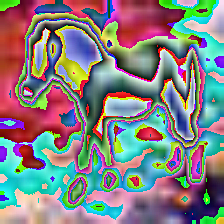

In [129]:
example_image_graphical

#### Imagen sin estandarizar

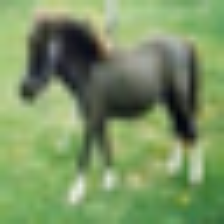

In [130]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/std_r, 1/std_g, 1/std_b]),
                                transforms.Normalize(mean = [ -mean_r, -mean_g, -mean_b ],
                                                     std = [ 1., 1., 1. ]),
                               ])
non_standard_image = invTrans(example_image_tensor)
non_standard_image = transform_to_image(non_standard_image)
non_standard_image

In [ ]:
# Fin